In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Import datasets
df_gdp = pd.read_csv('GDP-2015.csv')
df_le = pd.read_csv('life-expectancy.csv')

In [61]:
# Renaming and dropping unnecessary columns
df_gdp = df_gdp.rename(columns = {'Entity' : 'Country'})
df_gdp = df_gdp.drop(columns = ['Code'])

df_le = df_le.rename(columns = {'Entity' : 'Country', 'Life expectancy (years)' : 'Life expectancy'})
df_le = df_le.drop(columns = ['Code'])

In [62]:
# Merge and rework data
df_2015 = pd.merge(df_gdp, df_le)
df_2015["GDP per capita"] = np.log10(df_2015["GDP per capita"])

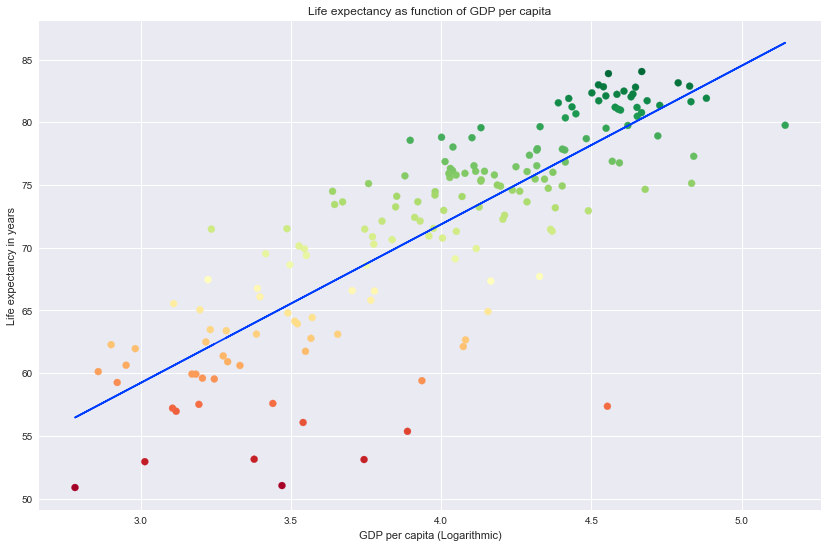

In [63]:
# Map data to x, y values and create regression line
x = df_2015["GDP per capita"]
y = df_2015["Life expectancy"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_2015["Life expectancy"], cmap="RdYlGn")

# Create title and labels
plt.title('Life expectancy as function of GDP per capita')
plt.xlabel('GDP per capita (Logarithmic)')
plt.ylabel('Life expectancy in years')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()